In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Import Required Libraries</h1>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

from warnings import filterwarnings
filterwarnings("ignore")

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Load DataSet Libraries</h1>
</div>

In [3]:
data=pd.read_csv("ecommerce_customer_churn_dataset.csv")

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Dataset overview</h1>
</div>

In [4]:
print("Dataset Rows: ",data.shape[0])
print("Dataset Columns: ",data.shape[1])

Dataset Rows:  50000
Dataset Columns:  25


In [5]:
data.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [6]:
data.tail()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
49995,38.0,Female,USA,Los Angeles,10.0,10.0,35.8,8.8,51.2,3.0,...,9.2,5.0,1.0,20.7,25.2,1.0,2365.98,3499.0,0,Q2
49996,37.0,Male,USA,Chicago,1.4,21.0,32.4,9.6,32.5,2.0,...,17.6,5.0,3.0,38.6,12.1,4.0,1293.60,3154.0,0,Q3
49997,44.0,Female,USA,Phoenix,2.8,19.0,40.3,10.4,50.6,1.0,...,25.2,4.0,6.0,59.9,NaN,1.0,1655.28,1622.0,0,Q1
49998,41.0,Female,USA,Chicago,2.9,17.0,29.9,10.1,60.8,1.0,...,34.6,5.0,2.0,NaN,14.1,3.0,1286.11,2634.0,0,Q2
49999,56.0,Male,UK,Leeds,2.2,2.0,18.2,NaN,46.0,0.0,...,0.0,7.0,0.0,0.0,4.2,1.0,1072.61,612.0,0,Q3


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.isnull().sum()

Age                              2495
Gender                              0
Country                             0
City                                0
Membership_Years                    0
Login_Frequency                     0
Session_Duration_Avg             3399
Pages_Per_Session                3000
Cart_Abandonment_Rate               0
Wishlist_Items                   4000
Total_Purchases                     0
Average_Order_Value                 0
Days_Since_Last_Purchase         3000
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Payment_Method_Diversity         2500
Lifetime_Value                      0
Credit_Balance                   5500
Churned                             0
Signup_Quarter                      0
dtype: int64

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Data Info</h1>
</div>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Descriptive Statistic</h1>
</div>

In [10]:
data.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,47505.000000,50000.000000,50000.000000,46601.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,...,45509.000000,47472.000000,49832.000000,46500.000000,44000.000000,45000.000000,47500.000000,50000.000000,44500.000000,50000.000000
mean,37.802968,2.984009,11.624660,27.660754,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,...,6.680913,20.937980,5.681831,2.853312,29.364466,19.371607,2.353874,1440.626292,1966.233258,0.289000
std,11.834668,2.059105,7.810657,10.871013,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,...,6.143027,14.252561,2.676052,2.328948,20.574021,9.419252,1.110012,907.249443,1225.072166,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,...,2.900000,9.900000,4.000000,1.000000,13.200000,12.500000,2.000000,789.817500,1049.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,...,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.000000,1243.415000,1896.000000,0.000000
75%,46.000000,4.000000,17.000000,34.700000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,...,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,3.000000,1874.000000,2791.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,...,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.000000,8987.240000,7197.000000,1.000000


<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Data Visualization</h1>
</div>

# UniVariate Analysis

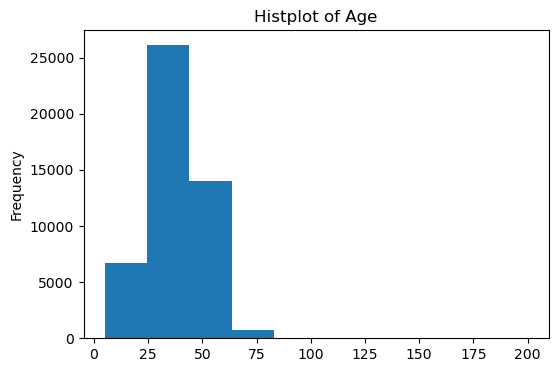

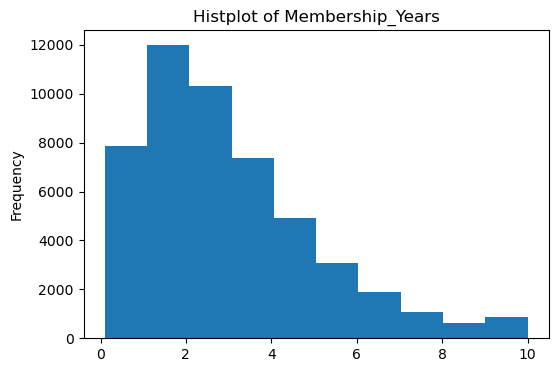

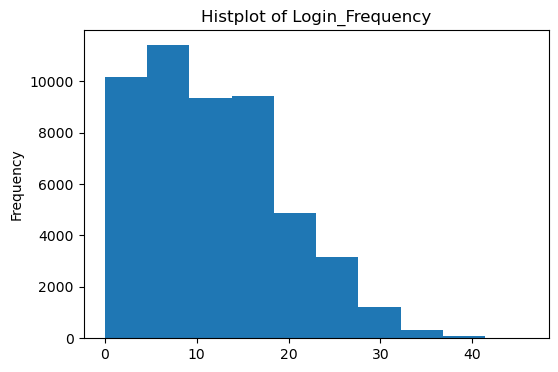

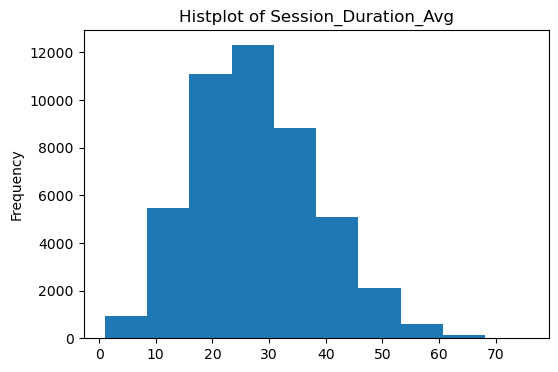

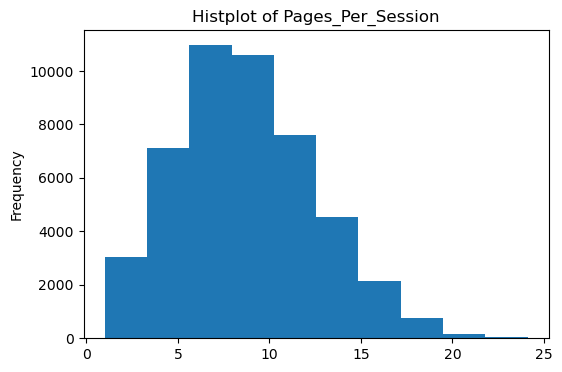

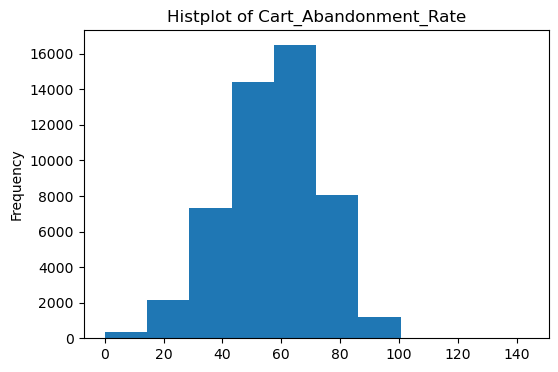

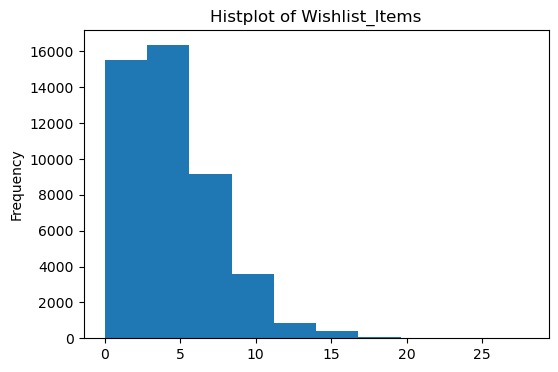

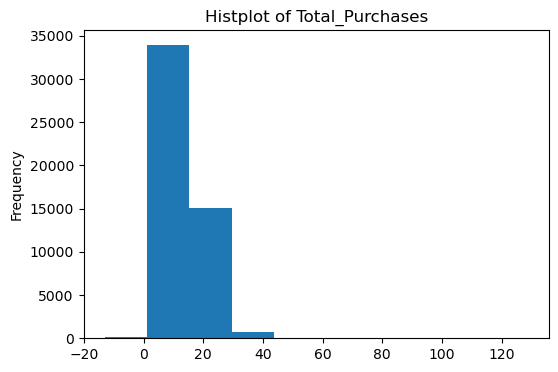

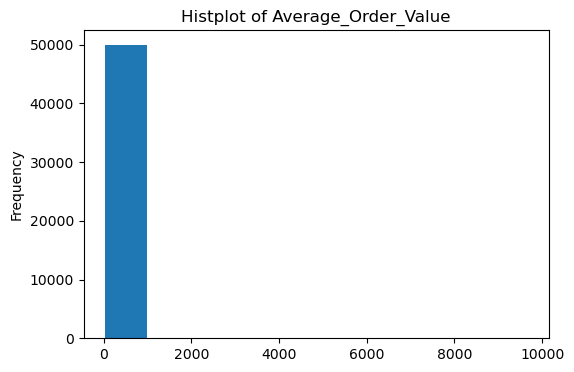

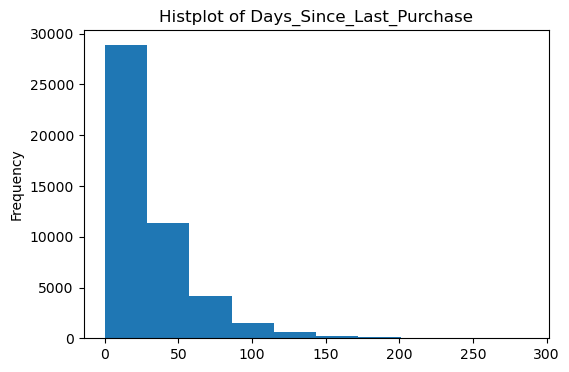

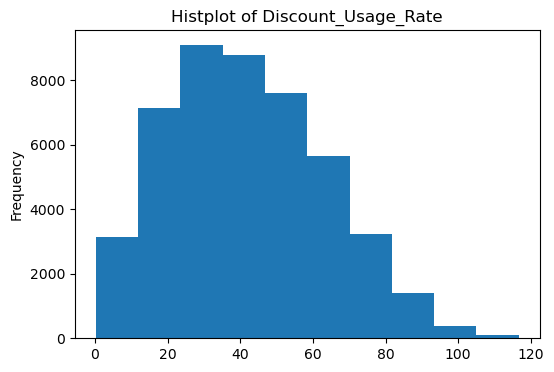

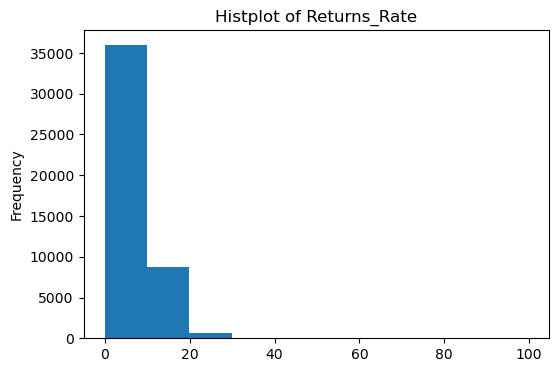

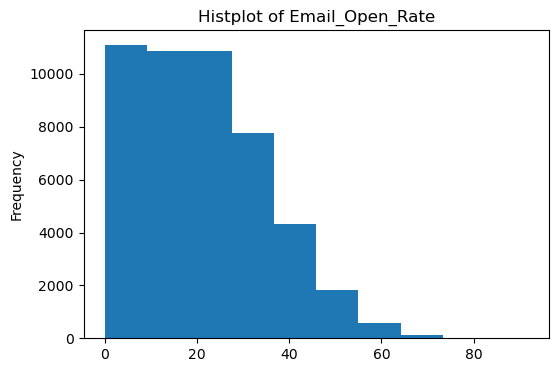

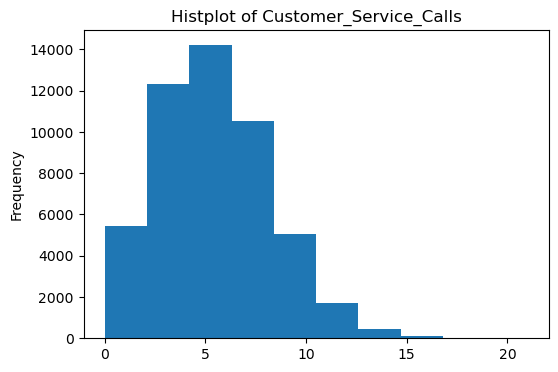

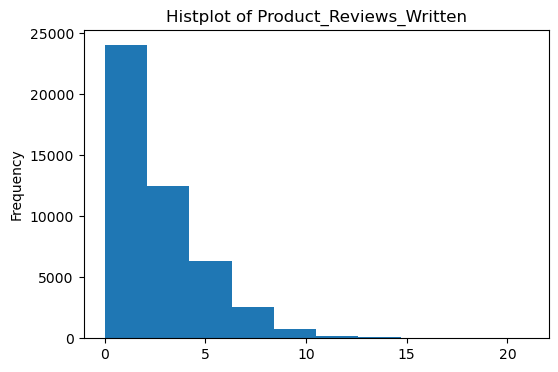

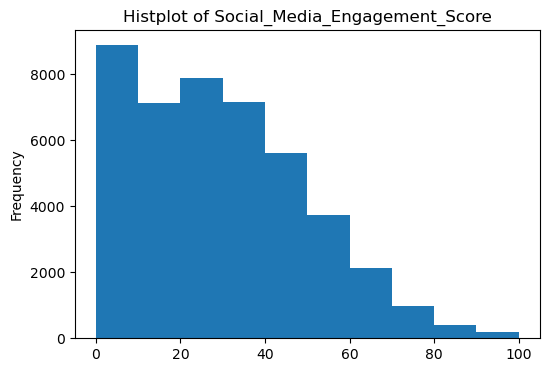

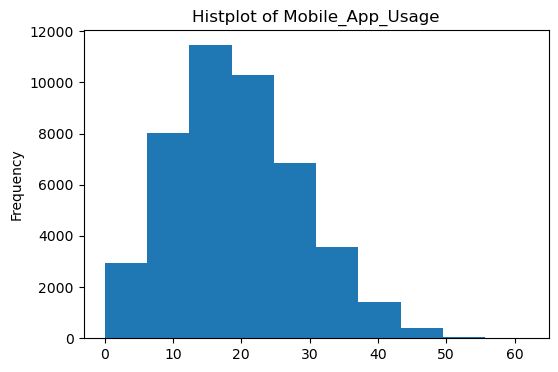

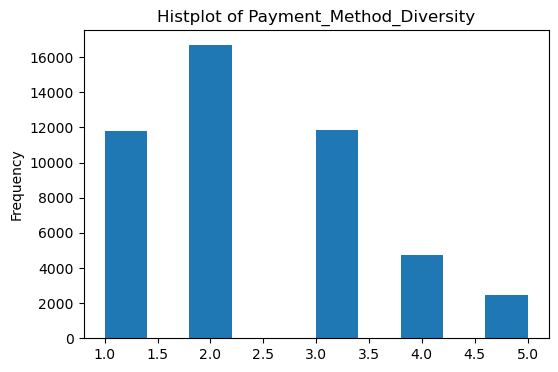

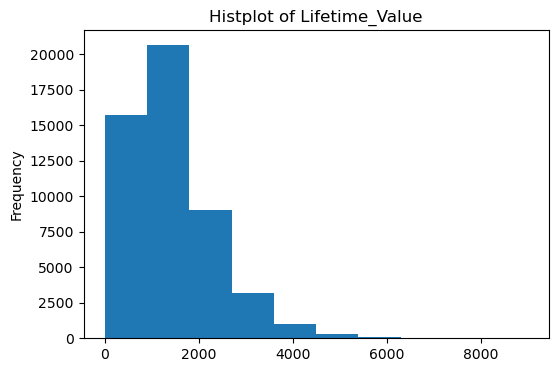

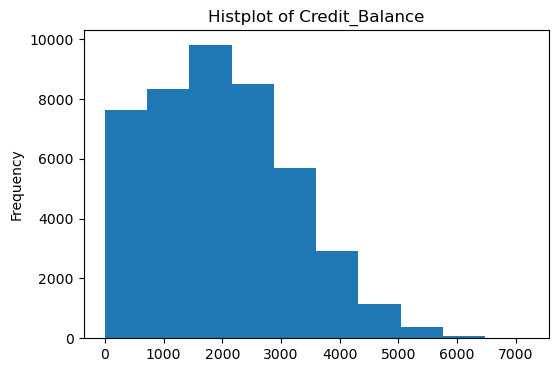

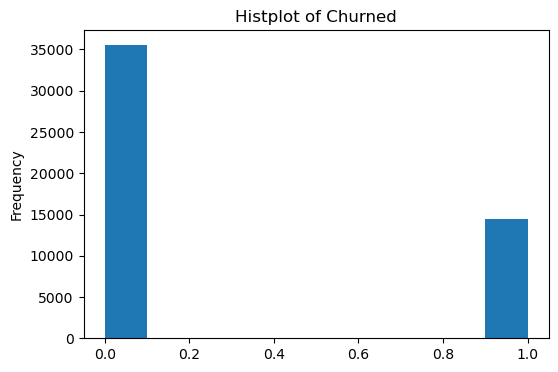

In [11]:
for col in data.select_dtypes(include=['int64','float64']).columns:
       
    data[col].plot(kind='hist',
                   title=f'Histplot of {col}',
                   figsize=(6,4))
    
    plt.show()

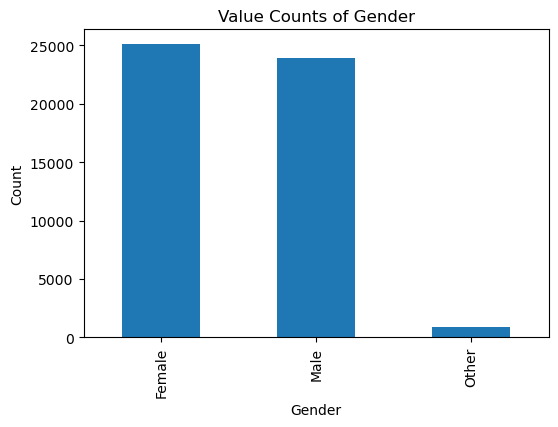

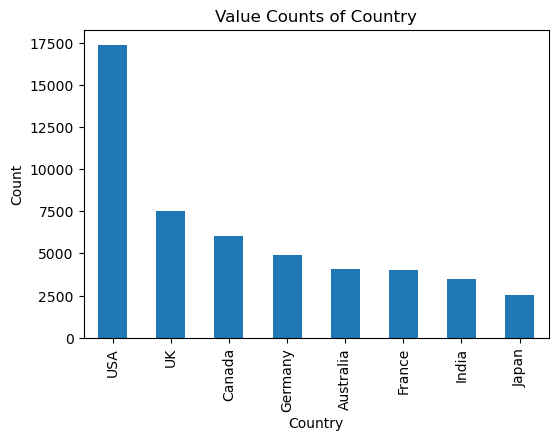

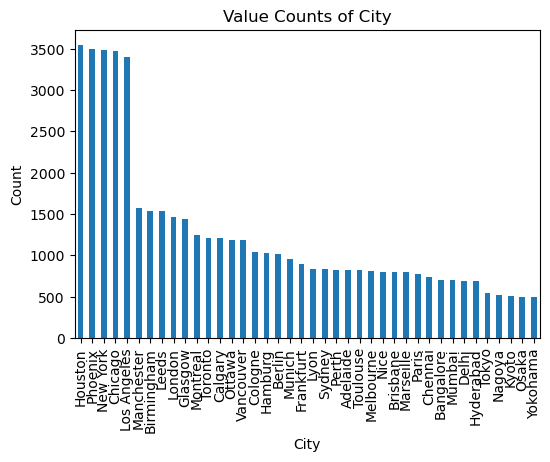

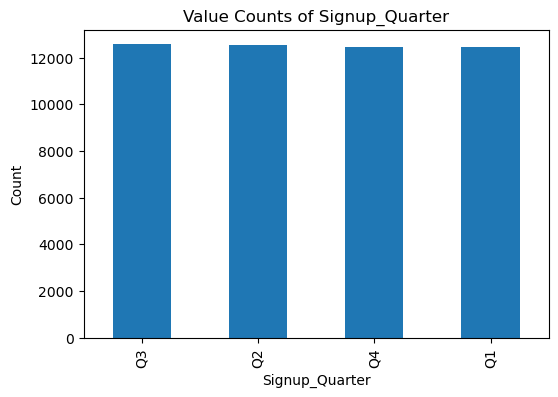

In [12]:
for col in data.select_dtypes(include=['object']).columns:

    data[col].value_counts().plot(kind='bar',
                                  title=f'Value Counts of {col}',
                                  xlabel=col,
                                  ylabel='Count',
                                  figsize=(6,4))
    
    plt.show()

# BiVariate Analysis

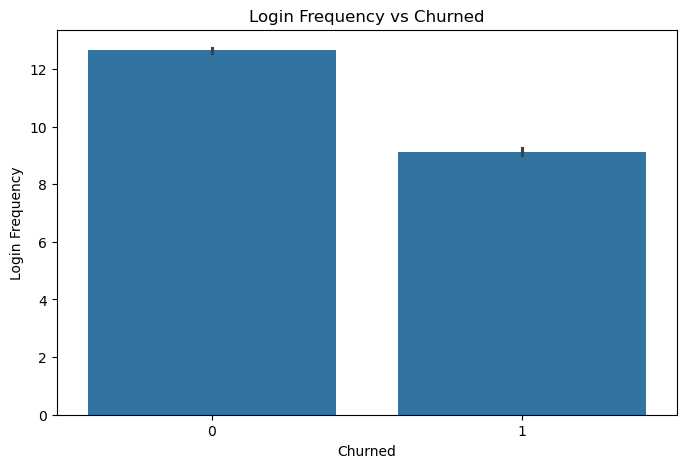

In [13]:
# Login_Frequency and Churned correlation
plt.figure(figsize=(8,5))

sns.barplot(x='Churned',
            y='Login_Frequency',
            data=data)

plt.title('Login Frequency vs Churned')
plt.xlabel('Churned')
plt.ylabel('Login Frequency')
plt.show()

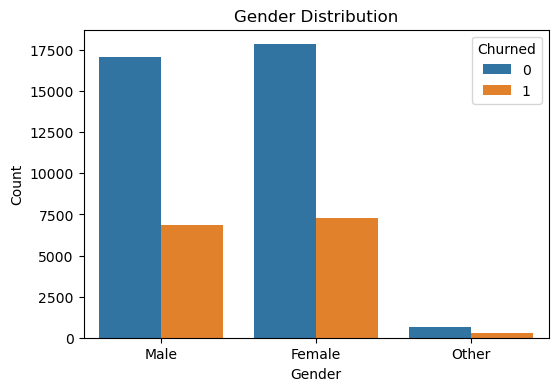

In [14]:
#  Gender countplot
plt.figure(figsize=(6,4))

sns.countplot(x='Gender'
              ,hue='Churned',
              data=data)

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count') 
plt.show()

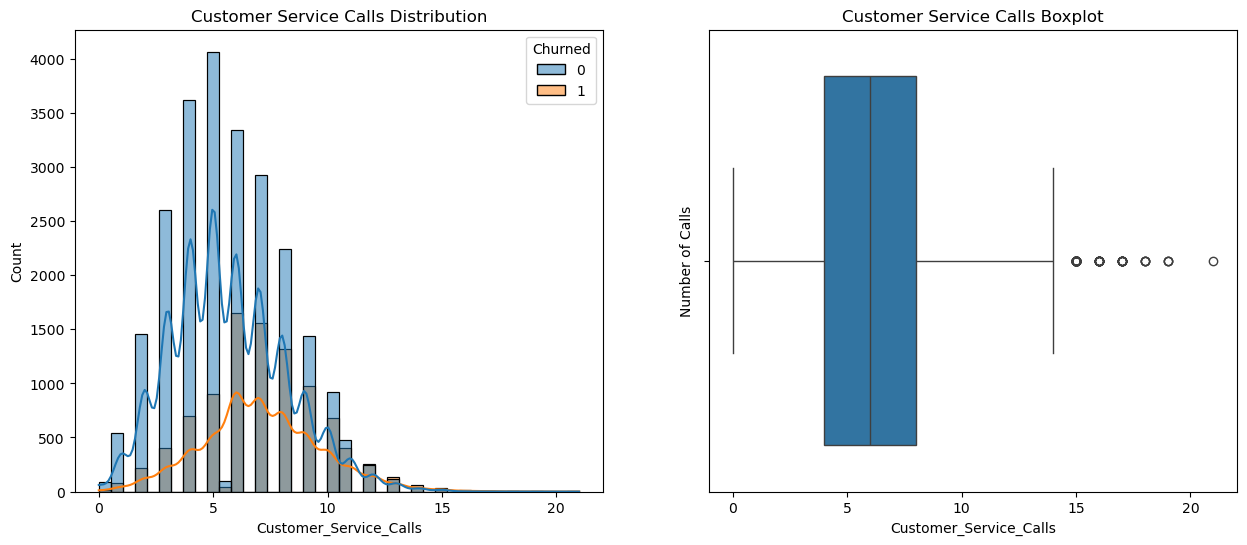

In [58]:
# Customer_Service_Calls vs Churned
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x='Customer_Service_Calls',
             hue='Churned',
             data=data,
             bins=40, 
             kde=True)
plt.title('Customer Service Calls Distribution')

plt.subplot(1,2,2)
sns.boxplot(x="Customer_Service_Calls", data=data)
plt.title('Customer Service Calls Boxplot')
plt.ylabel('Number of Calls')
plt.show()

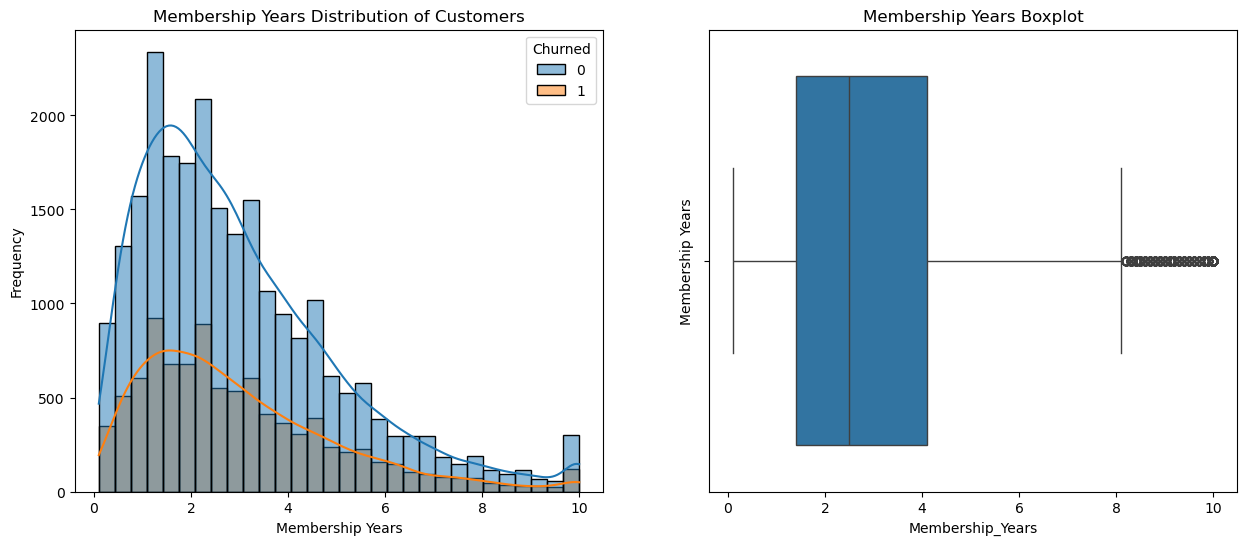

In [59]:
# Memberhip_Years Distribution
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x='Membership_Years',
             hue='Churned',
             bins=30,
             kde=True,
             color='green',
             data=data)
plt.title('Membership Years Distribution of Customers')
plt.xlabel('Membership Years')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(x="Membership_Years", data=data)
plt.title('Membership Years Boxplot')
plt.ylabel('Membership Years')

plt.show()

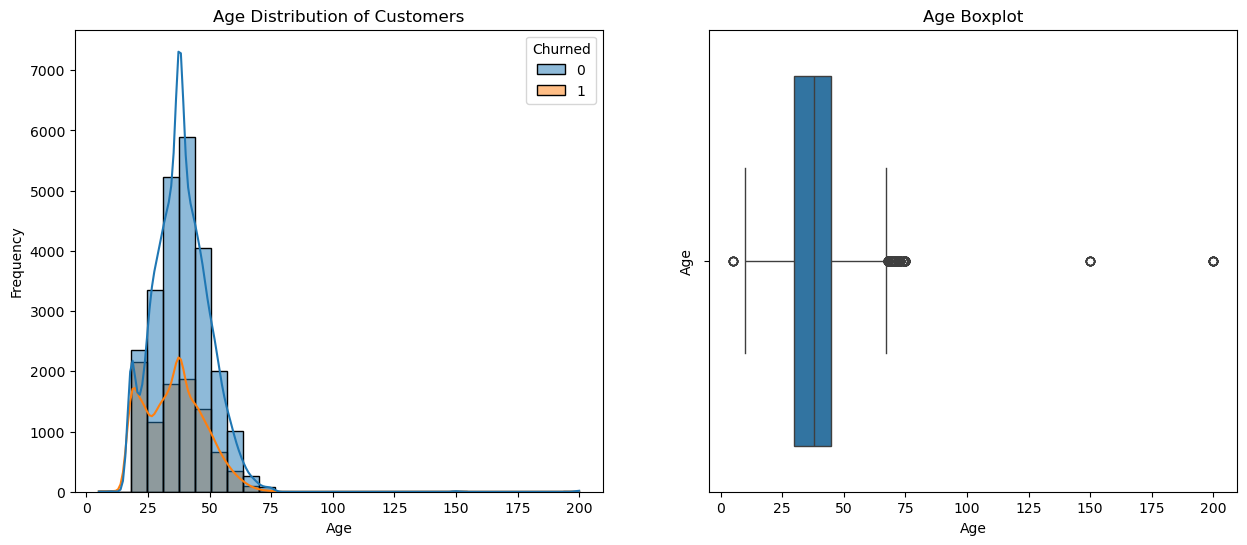

In [60]:
# Memberhip_Years Distribution
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',
             hue='Churned',
             bins=30,
             kde=True,
             color='green',
             data=data)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(x="Age", data=data)
plt.title('Age Boxplot')
plt.ylabel('Age')

plt.show()

# Multivariate Analysis

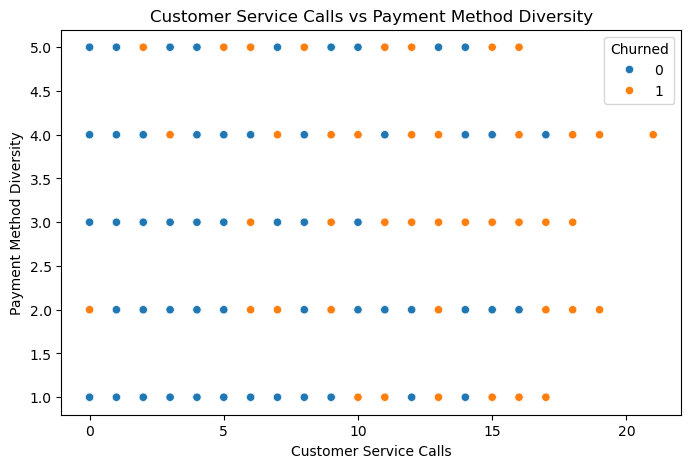

In [18]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='Customer_Service_Calls',
                y='Payment_Method_Diversity', 
                hue='Churned', 
                data=data)

plt.title('Customer Service Calls vs Payment Method Diversity')
plt.xlabel('Customer Service Calls')
plt.ylabel('Payment Method Diversity')
plt.show()

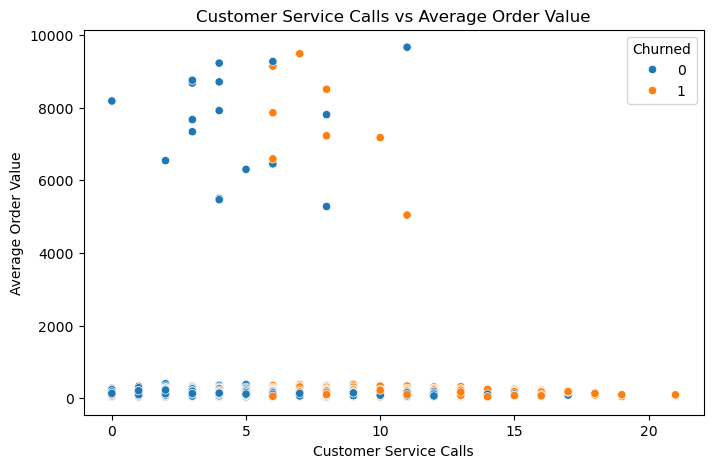

In [19]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='Customer_Service_Calls', 
                y='Average_Order_Value', 
                hue='Churned', 
                data=data)

plt.title('Customer Service Calls vs Average Order Value')
plt.xlabel('Customer Service Calls')
plt.ylabel('Average Order Value')
plt.show()

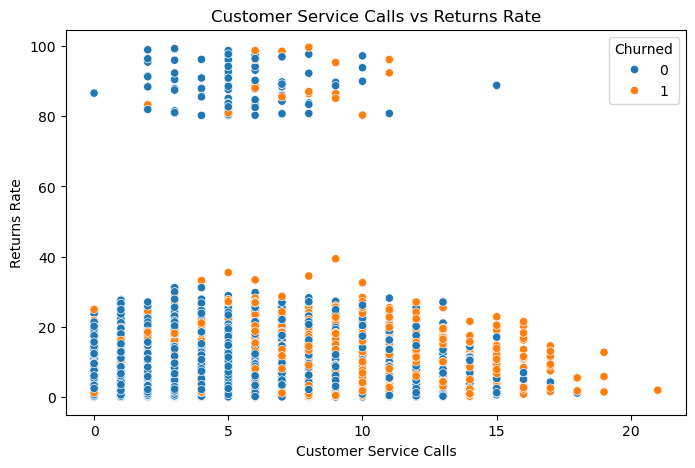

In [20]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='Customer_Service_Calls', 
                y='Returns_Rate', 
                hue='Churned', 
                data=data)

plt.title('Customer Service Calls vs Returns Rate')
plt.xlabel('Customer Service Calls')
plt.ylabel('Returns Rate')
plt.show()

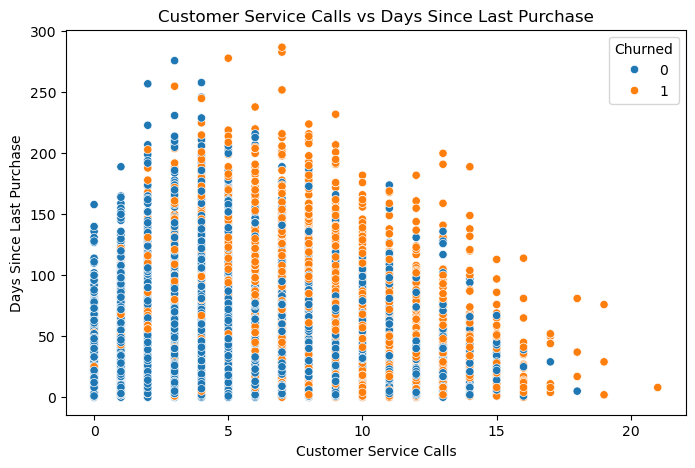

In [21]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='Customer_Service_Calls', 
                y='Days_Since_Last_Purchase', 
                hue='Churned', 
                data=data)

plt.title('Customer Service Calls vs Days Since Last Purchase')
plt.xlabel('Customer Service Calls')
plt.ylabel('Days Since Last Purchase')
plt.show()

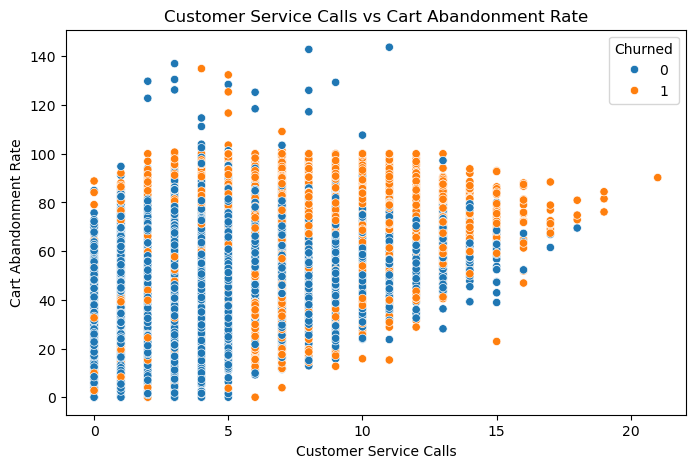

In [22]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='Customer_Service_Calls', 
                y='Cart_Abandonment_Rate', 
                hue='Churned', 
                data=data)

plt.title('Customer Service Calls vs Cart Abandonment Rate')
plt.xlabel('Customer Service Calls')
plt.ylabel('Cart Abandonment Rate')
plt.show()

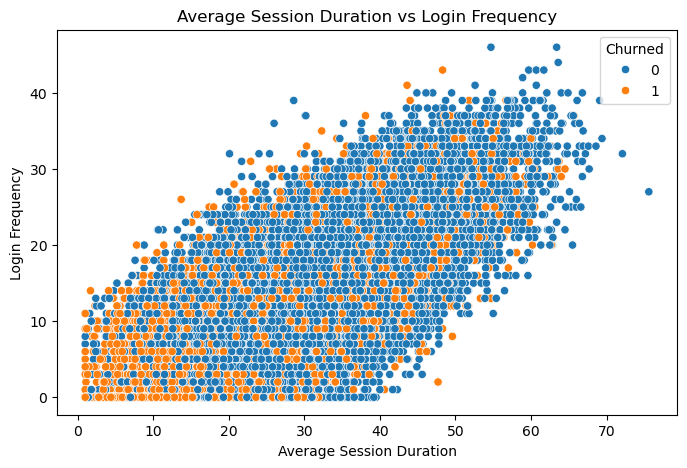

In [23]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='Session_Duration_Avg', 
                y='Login_Frequency', 
                hue='Churned', 
                data=data)

plt.title('Average Session Duration vs Login Frequency')
plt.xlabel('Average Session Duration')
plt.ylabel('Login Frequency')
plt.show()

<div style="border-radius: 100px 0px 100px 10px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Handling Missing Values</h1>
</div>

In [24]:
imputer=KNNImputer(n_neighbors=1000)

for col in data.columns:
    if data[col].isnull().sum()>0:
        data[[col]]=imputer.fit_transform(data[[col]])

In [25]:
data.isnull().sum()

Age                              0
Gender                           0
Country                          0
City                             0
Membership_Years                 0
Login_Frequency                  0
Session_Duration_Avg             0
Pages_Per_Session                0
Cart_Abandonment_Rate            0
Wishlist_Items                   0
Total_Purchases                  0
Average_Order_Value              0
Days_Since_Last_Purchase         0
Discount_Usage_Rate              0
Returns_Rate                     0
Email_Open_Rate                  0
Customer_Service_Calls           0
Product_Reviews_Written          0
Social_Media_Engagement_Score    0
Mobile_App_Usage                 0
Payment_Method_Diversity         0
Lifetime_Value                   0
Credit_Balance                   0
Churned                          0
Signup_Quarter                   0
dtype: int64

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Handling Outliers</h1>
</div>

In [26]:
columns=['Age', 
   'Membership_Years', 
   'Login_Frequency', 
   'Session_Duration_Avg',
   'Pages_Per_Session', 
   'Cart_Abandonment_Rate']

columns2=['Wishlist_Items',
  'Total_Purchases', 
  'Average_Order_Value', 
  'Days_Since_Last_Purchase',
  'Discount_Usage_Rate', 
  'Returns_Rate',
  'Email_Open_Rate']

columns3=['Product_Reviews_Written',
   'Social_Media_Engagement_Score', 
   'Mobile_App_Usage',
   'Payment_Method_Diversity', 
   'Lifetime_Value', 
   'Credit_Balance']

# Outliers Detection

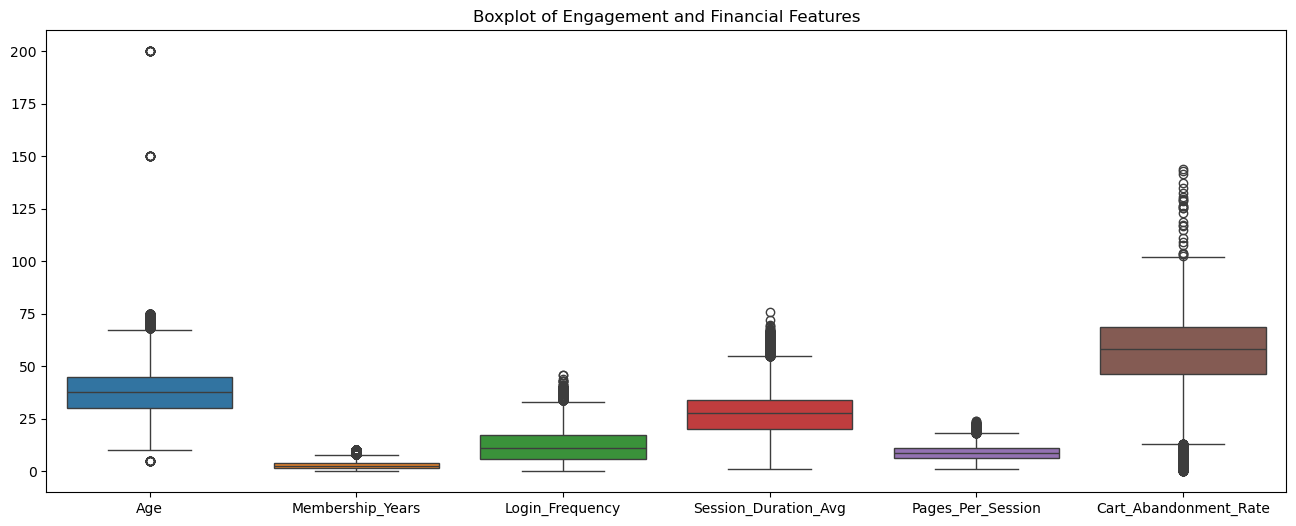

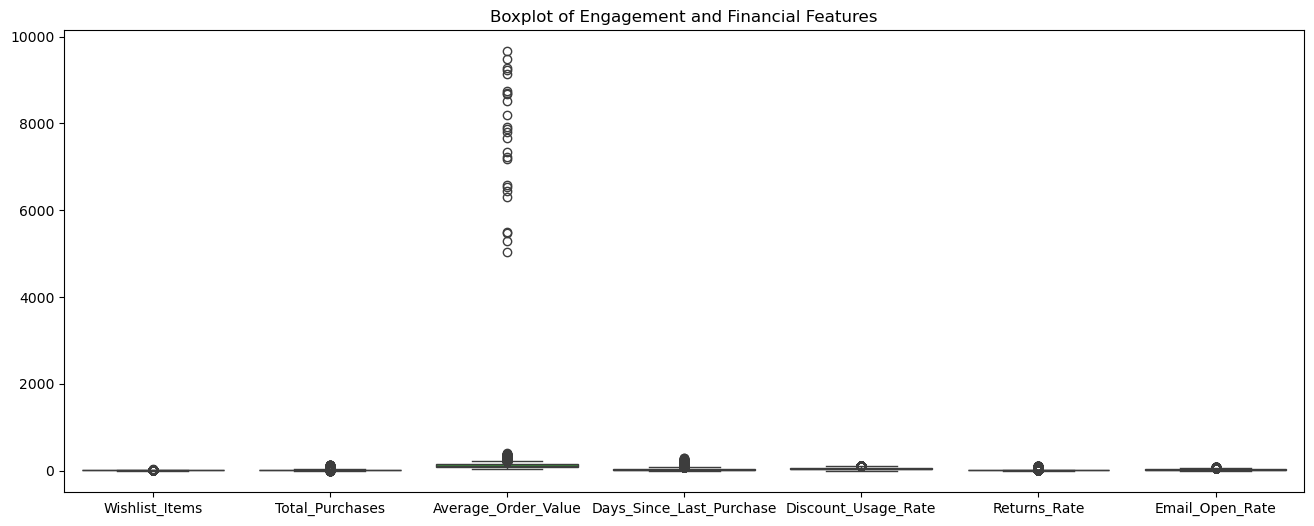

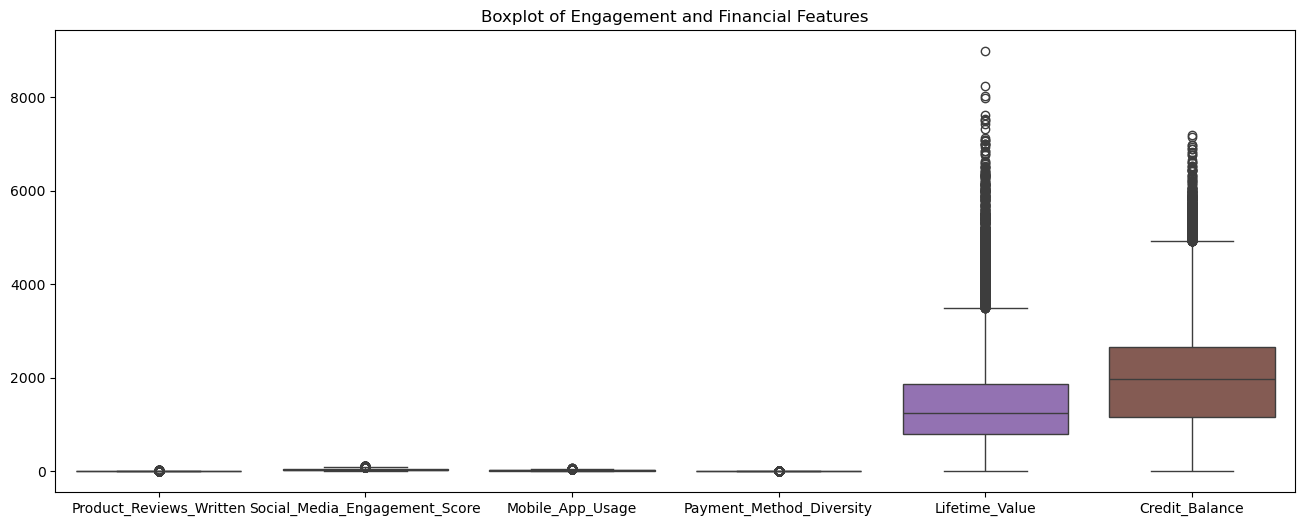

In [ ]:
for columns in [columns, columns2, columns3]:
    plt.figure(figsize=(16,6))
    sns.boxplot(data=data[columns])
    plt.title('Boxplot of numerical Features before Outlier Removal')
    plt.show()

# Outliers Removal

In [28]:
for cols in [columns, columns2, columns3]:
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


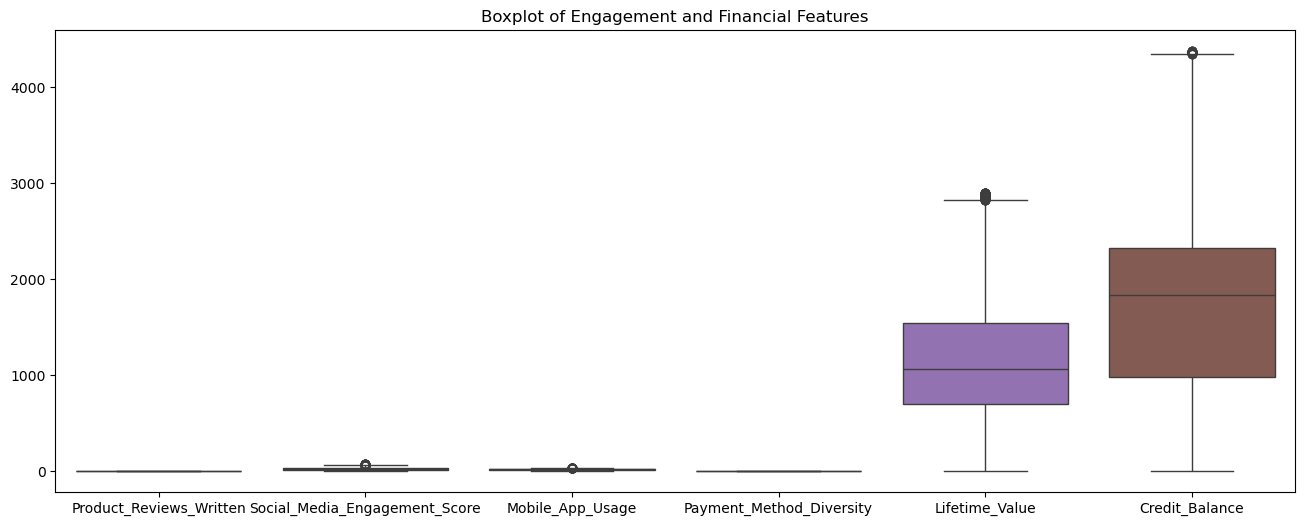

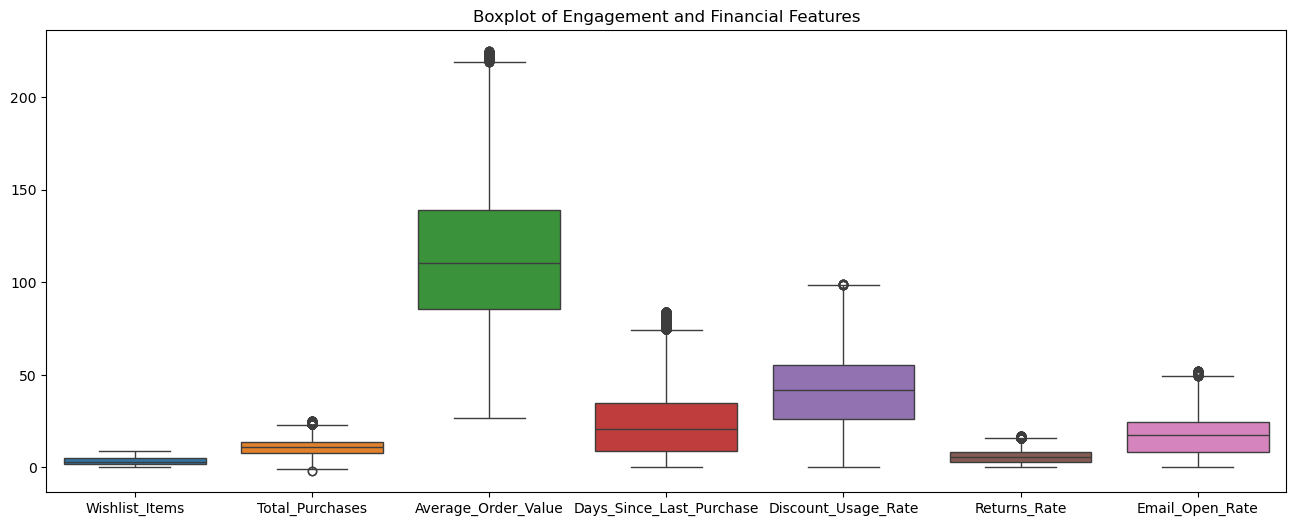

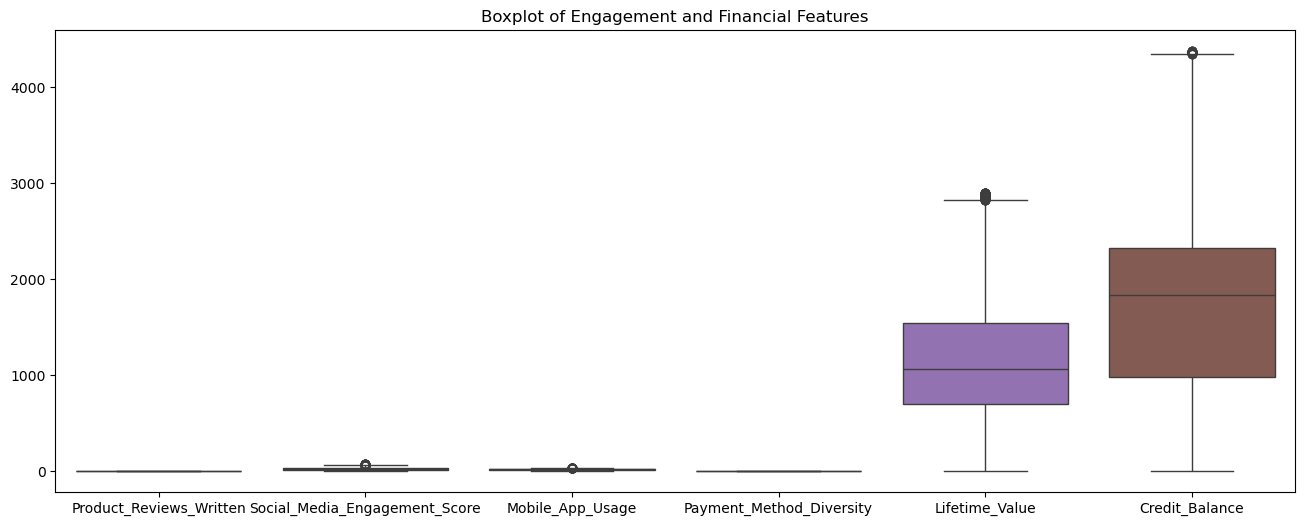

In [ ]:
for columns in [columns, columns2, columns3]:
    plt.figure(figsize=(16,6))
    sns.boxplot(data=data[columns])
    plt.title('Boxplot of Numerical Features after Outlier Removal')
    plt.show()

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Feature Encoding</h1>
</div>

In [ ]:
data.head()

In [ ]:
# Label Encoder
le=LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col]=le.fit_transform(data[col])
    
data.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,1,2,21,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.000000,16.300000,20.8,1.000000,953.33,2278.0,0,0
1,36.0,1,6,20,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.000000,29.364466,23.3,3.000000,1067.47,3028.0,0,3
2,45.0,0,1,38,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.000000,29.364466,8.8,2.353874,1289.75,2317.0,0,3
5,35.0,1,5,35,3.5,6.0,21.9,6.9,74.4,0.0,...,16.0,8.0,2.000000,14.300000,11.2,2.000000,1995.43,2418.0,1,0
7,47.0,0,7,13,1.6,14.0,24.1,8.3,59.9,2.0,...,5.5,5.0,2.853312,30.100000,7.6,2.000000,1394.04,2274.0,0,3


<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Feature Selection</h1>
</div>

In [31]:
x=data[['Age', 
      'Login_Frequency', 
      'Session_Duration_Avg', 
      'Pages_Per_Session',
      'Cart_Abandonment_Rate', 
      'Wishlist_Items', 
      'Total_Purchases',
      'Days_Since_Last_Purchase',
      'Discount_Usage_Rate',
      'Email_Open_Rate',
      'Customer_Service_Calls', 
      'Product_Reviews_Written',
      'Lifetime_Value']]

y=data['Churned']

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Data Split</h1>
</div>

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2,
                                               random_state=42,
                                               stratify=y)

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Cross Validation | Fit Model</h1>
</div>

# Logistic Regression

In [33]:
lr = LogisticRegression(max_iter=100)

kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

# Calculate accuracy scores using Cross-Validation
cv_scores = cross_val_score(lr, 
                            x_train, 
                            y_train, 
                            cv=kf, 
                            scoring='accuracy')

avg_acc = np.mean(cv_scores)
print(f"✅ Cross-Validation Accuracy: {avg_acc:.5f}")

✅ Cross-Validation Accuracy: 0.77783


# XGBoost

In [34]:
xgb = XGBClassifier(n_estimators=100,
                    random_state=42)

kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

# Calculate accuracy scores using Cross-Validation
cv_scores = cross_val_score(xgb, 
                            x_train, 
                            y_train, 
                            cv=kf, 
                            scoring='accuracy')

avg_acc = np.mean(cv_scores)
print(f"✅ Cross-Validation Accuracy: {avg_acc:.5f}")

✅ Cross-Validation Accuracy: 0.90042


# Random Forest

In [36]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=42)

kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

# Calculate accuracy scores using Cross-Validation
cv_scores = cross_val_score(rf, 
                            x_train, 
                            y_train, 
                            cv=kf, 
                            scoring='accuracy')

avg_acc = np.mean(cv_scores)
print(f"✅ Cross-Validation Accuracy: {avg_acc:.5f}")
rf.fit(x_train,y_train)

✅ Cross-Validation Accuracy: 0.90135


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Model Evaluation</h1>
</div>

In [38]:
# Predict on the test set (use the already trained rf model)
y_pred = rf.predict(x_test)

print("\nEvaluating model on test data........")

# Recall_Score
recall = recall_score(y_test, y_pred)
print(f"✅ Test Recall: {recall:.2f}")

# Precision_Score 
precision = precision_score(y_test, y_pred)
print(f"✅ Test Precision: {precision:.2f}")

# F1_Score 
f1 = f1_score(y_test, y_pred)
print(f"✅ Test F1 Score: {f1:.2f}")

# Accuracy_Score
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {accuracy:.2f}\n")

#  Confusion_Matrix
cm = confusion_matrix(y_test, y_pred)
print("✅ confusion_matrix:\n",cm)


Evaluating model on test data........
✅ Test Recall: 0.74
✅ Test Precision: 0.88
✅ Test F1 Score: 0.81
✅ Test Accuracy: 0.90

✅ confusion_matrix:
 [[4653  199]
 [ 484 1411]]


<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Heatmap</h1>
</div>

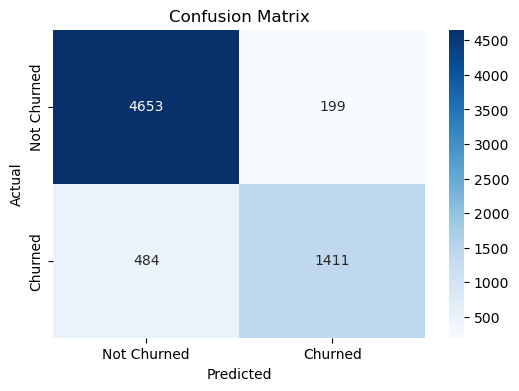

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))

sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Save Model in Pickle File</h1>
</div>

In [41]:
# pickle to save model
import pickle
with open('customer_churn_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

print("Model saved to customer_churn_model.pkl")

Model saved to customer_churn_model.pkl


If you find this notebook useful<br>
Consider it with giving Upvoting❤️<br>
<h1>Thank You!</h1>

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid black; padding: 20px; background-color: orange; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">The End..........</h1>
</div>